# Computer Based Numerical and Statistical Techniques Project<br>


Name: Shaurya Pratap Singh<br>
Roll Number: 160102364<br>
Class: CSE - D<br>

Name: Shubham Guleria<br>
Roll Number: 160102204<br>
Class: CSE - D<br>

### Data-Set
Daily details for the exchange of the crypto currency 'Bitcoin' for the year 2016.<br>
[Link for the data set.](https://www.kaggle.com/jessevent/all-crypto-currencies/data)

### Problem Statement
The aim of the following project is to study the application of **Newton’s Interpolation Method of Divided Differences** in the prediction of missing values in a data-set. This could find an appilcation in the real world in the areas such as prediction of missing data or data retrieval in case of memory corruption.<br>

We have tried to empirically study the algorithm on the data-set of the exchange rate of the crypto currency, *‘Bitcoin’* for the year 2016.<br>

### Mathematical Formulae Involved
**1. Newton's Divided Difference Interpolation formula: ** We chose to use the newton divided difference formula so as to see how accurate the predictions would be, given we choose random data although there is no restriction so as to choose a method of interpolation. Real time data is usually not evenly distributed thus this method finds application far more often.

**2. Relative Error Calculation: ** This has been used so as to perform an empirical analysis of the interpolation method that was decided to be used by comparing predicted value with the true value.

### Software Used
**Programming Language: ** Python has been chosen as the programming language since it offers the state of the art libraries for data-analysis. The libraries involved in the following project are:<br><br>
`pandas`: A powerful data - manupulation library.<br>
`numpy`: A library that allows handeing of complex data-types by the means of vectors known as NDArrays.<br>
`matplotlib`: A library that allows visualisation of data by the means of plots and graphs.<br>
`random`: A library that allows random number generation.<br>


**Documentation: ** The documentation for the following project has been done on *Jupyter Notebooks*. These are a fork of ipython interactive shell and thus help in analysing data within the documentation by manupulating it. It is a modern apporach to interactive programming.

### Interactive Project

**Step 1:** Import the necessary modules and prepare our enviornment.

In [1]:
# import statements
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allows for inline poltting, so that new window doesn't pop
%matplotlib inline

**Step 2:** Import our data-set into a dataframe object and assign header names.

In [2]:
# preparing a data frame
headers = ['Day', 'Value']
data = pd.read_csv('Bitcoin_Data_Set.csv', names = headers)

# head prints first 5 values
data.head()

,Day,Value
0,1,434.33
1,2,433.44
2,3,430.01
3,4,433.09
4,5,431.96


*The above Table showcases our data-set.*<br><br>
**Step 3:** Writing modlues that define our interpolation technique of divided differences.

In [3]:
# Returns a Coefficient Array takes 'x, y arrays'  as arguments
def coefficient(x_array, y_array):
    # astype() typecasts an entire data object.
    x_array.astype(float)
    y_array.astype(float)
    n = len(x_array)
    
    coefficient_array = []

    for i in range(n):
        coefficient_array.append(y_array[i])

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coefficient_array[i] = float(coefficient_array[i]-coefficient_array[i-1])/float(x_array[i]-x_array[i-j])

    return np.array(coefficient_array)

In [4]:
# Returns the value f(x) corresponding to x, takes 'coefficient array', 'x array' and 'interpolation variable x' as arguments
def evaluate(coefficient_array, x_array, x):
    x_array.astype(float)
    n = len(coefficient_array) - 1
    fx = coefficient_array[n]

    for i in range(n - 1, -1, -1):
        fx = fx * (x - x_array[i]) + coefficient_array[i]

    return fx

**Step 4:** After writing the modules, we *Sample* our data for a set of values that will help us interpolate. This is done using the `pd.sample()` method that can sample a set of n values in the data set or a fraction of it.

In [5]:
def random_selections(data):
    data_random = data.sample(6)
    return data_random.sort_values('Day')

In [6]:
data_random = random_selections(data)

#.head() function returns the first five values
data_random.head()

,Day,Value
3,4,433.09
44,45,407.23
114,115,458.56
168,169,748.91
247,248,608.63


*The above table shows the sampled values. A fact to notice is that we have only sampled **six** values. Six was chosen to be the optimal number as newton's interpolation method for divided differences doesn't give accurate answers for functions that have large swings, to showcase a prediction on such functions we observed that six samples was enough. Taking a large number of samples resulted in bizzare behaviour of our interpolation algorithm and taking fewer cases resulted in underfitting our data.<br><br>*

**Step 5:** Our next step is to define a function for generating a table of interpolated values against the days and their true values. We automate the test cases by the help of selecting n values within the range of `data_random` DataFrame and then calculating the predicted values by the `evaluate()` and `coefficient()` methods we defined earlier. The result list contains `(day, true value, predicted value)` in tuple format, which is then converted to a DataFrame, sorted and returned.

In [7]:
def interpolated_table(df_random, n):
    # Creating our x and y arrays for Days and Values.
    x_array = np.array(df_random['Day'])
    y_array = np.array(df_random['Value'])

    # Random selection of values to be predicted.
    selection = []
    selection += random.sample(range(int(df_random.min(0)['Day']), int(df_random.max(0)['Day'])), n)
    result = pd.DataFrame([(x, data.iloc[x]['Value'], evaluate(coefficient(x_array, y_array), x_array, x)) for x in selection])
    result.columns = ['Day', 'True', 'Predicted']
    result.sort_values('Day', inplace = True)
    
    return result

In [8]:
result = interpolated_table(data_random, 100)
result.head()

,Day,True,Predicted
83,7,453.23,446.827629
63,9,447.99,453.697138
54,10,448.43,456.499453
39,13,430.31,462.584559
35,14,364.33,463.894817


*The above table showcases the first five values of our predictions the `df.head()` suffix can be removed to list the entire dataframe. We have made 100 predictions on values in between our sampled data*<br><br>
**Step 6:** Our next step is to visually analyse our result which is done by plotting the *Actual Value* and the *Predicted Value* against the days. For this we define `comparision_plot()` function.

In [9]:
def comparision_plot(result):
    fig = plt.plot(result.loc[:, 'Day'], result.loc[:, 'True'], label='Actual Value')
    fig = plt.plot(result.loc[:, 'Day'], result.loc[:, 'Predicted'], label='Predicted Value')
    plt.legend()
    plt.xlabel('Days')
    plt.ylabel('Value')
    return fig

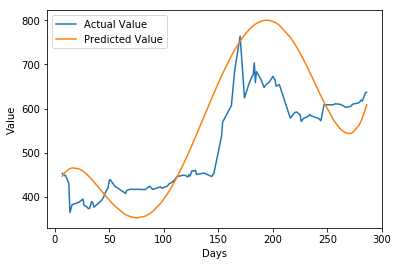

In [10]:
comparision_plot(result)

*A comparision of predicted vs true value. As we can see in the above plot, we have accurate predictions for certain regions and massive errors for others.*<br><br>
**Step 7:** To get a better idea, we calculate the relative error of our predictions and obtain a scatter plot against the days. Here we use *ndarrays* `true` and `predicted` for their convenient array operations.

In [11]:
 def scatter_plot(result):
    true = np.array(result.loc[:, 'True'])
    predicted = np.array(result.loc[:, 'Predicted'])
    error = [abs(true-predicted)/true * 100][0]
    plt.xlabel('Day')
    plt.ylabel('Rrelative % Error')
    plt.legend()
    fig = plt.scatter(result.loc[:, 'Day'], error, label='Error in prediction', alpha=0.5)

    return fig

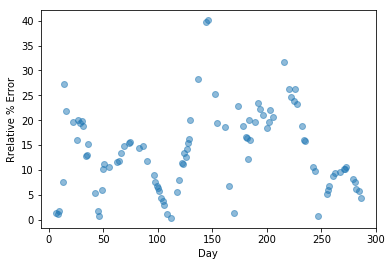

In [12]:
scatter_plot(result)

*From the above scatterplot we can get the relative percentage error on a certain prediction. We can notice that the trend here is that when the data has swings in values, polynomial interploation fails.*

**Step 8:** We now try to rectify this problem by the help of **stratified sampling.** We consider *strata* of our data as separate functions thus making them free of swings.This helps us interpolate a given value on a certain region.

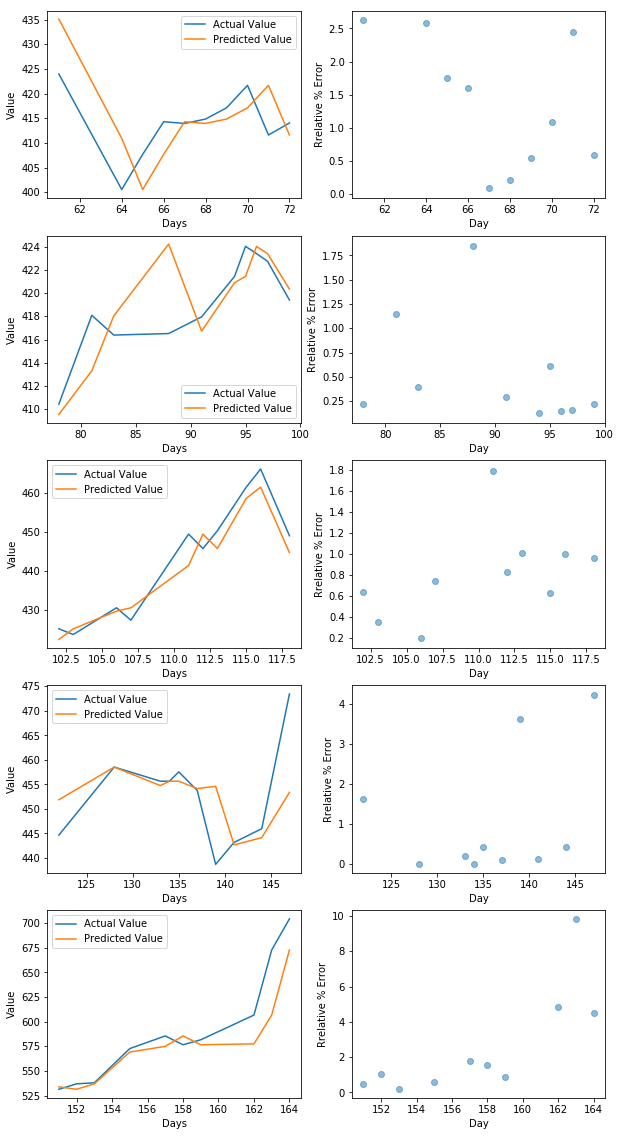

In [13]:
stratified_data = [data[60:75], data[75:100], data[100:120], data[120: 150], data[150:165]]
fig = plt.figure(figsize=(10, 20))
i = 1
for df_random in stratified_data:
    result = interpolated_table(df_random, 10)
    ax = fig.add_subplot(5, 2, i)
    ax = comparision_plot(result)
    ax = fig.add_subplot(5, 2, i + 1)
    ax = scatter_plot(result)
    i += 2

*By examining the above stratified examples, we notice that not only have we drastically improved the predictions but also found out how to efficiently utilise the algorithm on functions that keep swinging.*<br><br>

### Result
In this project we were able to find out the limitation of **Newton's Method of Interpolation for Divided Differences** and were able to find out a way to rectify this limitation by spliting our function into more linear counterparts and then interpolating them separately.